<a href="https://colab.research.google.com/github/Amelet/DeepLearning_TensorFLow/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification problems

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def make_confusion_matrix(y_test, y_preds, classes=None, figsize=(5,5), text_size=15):
  # create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plt
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label axes
  ax.set(title="Confusion Matrix",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.set_xlabel("Predicted label", fontsize=text_size)
  ax.set_ylabel("True label", fontsize=text_size)

  ax.tick_params(axis='x', labelsize=text_size)  # Increase x-axis tick labels size
  ax.tick_params(axis='y', labelsize=text_size)  # Increase y-axis tick labels size

  threshold = (cm.max() + cm.min())/2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
def plot_decision_boundary(model,X, y):
  """
  Plots the decision boundary
  """
  # Define the boundaries and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # mesh of possible X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass")
    # reshape predictions
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) # take the largest probability
                                                         # then reshape to match xx
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # visualize the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],
              X[:,1],
              c=y,
              cmap=plt.cm.RdYlBu,
              s=5)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## create a dummy data to try NN classification

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
data_df = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})
data_df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


shape of data: (1000, 3)


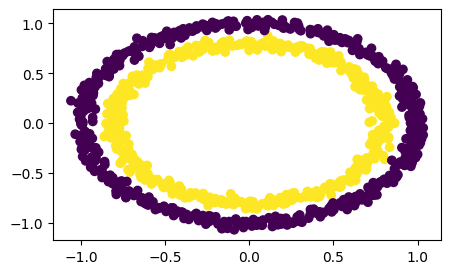

In [ ]:
print(f'shape of data: {data_df.shape}')
fig = plt.figure(figsize=(5,3))
plt.scatter(data_df.X0.values, data_df.X1.values, c=data_df.label.values, cmap='viridis')
plt.show()

In [ ]:
# Split into test train data set
data_shuf_df = data_df.sample(frac=1, random_state=42)
data_train_df = data_shuf_df.iloc[:800][:]
data_test_df = data_shuf_df.iloc[800:][:]

X_train, y_train = data_train_df.drop(['label'],axis=1).values, data_train_df.label.values
X_test, y_test = data_test_df.drop(['label'],axis=1).values, data_test_df.label.values
print(f'data is splitted into train ({len(y_train)}) and test ({len(y_test)}) sets')

data is splitted into train (800) and test (200) sets


# Steps in modeling

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


<Figure size 400x400 with 0 Axes>

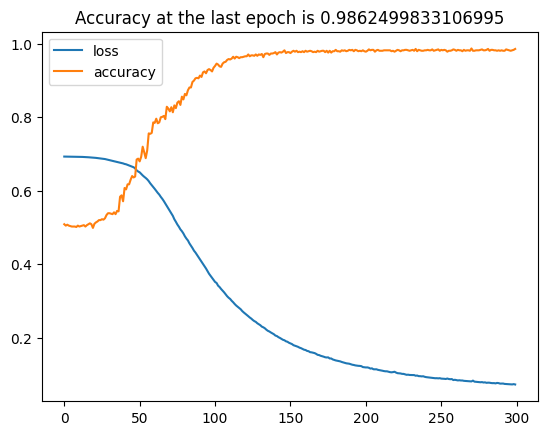

In [ ]:
tf.random.set_seed(42)

# 1. Create/import a model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit
history = model_1.fit(X_train, y_train, epochs=300, verbose=0)
model_1.summary()


history_df = pd.DataFrame(history.history)

fig = plt.figure(figsize=(4,4))
history_df.plot()
plt.title(f'Accuracy at the last epoch is {history_df.accuracy.values[-1]}')
plt.show()

# Predictions

In [ ]:
y_pred = model_1.predict(X_test)
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Accuracy on the test data set is {accuracy}')

7/7 [==============================] - 0s 5ms/step - loss: 0.0714 - accuracy: 0.9800
Accuracy on the test data set is 0.9800000190734863


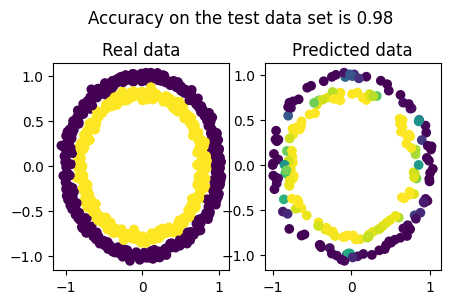

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
axes[0].scatter(data_train_df.X0.values, data_train_df.X1.values, c=data_train_df.label.values, cmap='viridis')
axes[0].set_title("Real data")
axes[1].scatter(data_test_df.X0.values, data_test_df.X1.values, c=y_pred, cmap='viridis')
axes[1].set_title("Predicted data")
# Set the figure-wide subtitle
plt.subplots_adjust(top=0.8)  # Adjust the top of the subplot(s)
fig.suptitle(f'Accuracy on the test data set is {np.round(accuracy,3)}')
plt.show()

Use function `plot_decision_boundary()`.

313/313 [==============================] - 2s 5ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


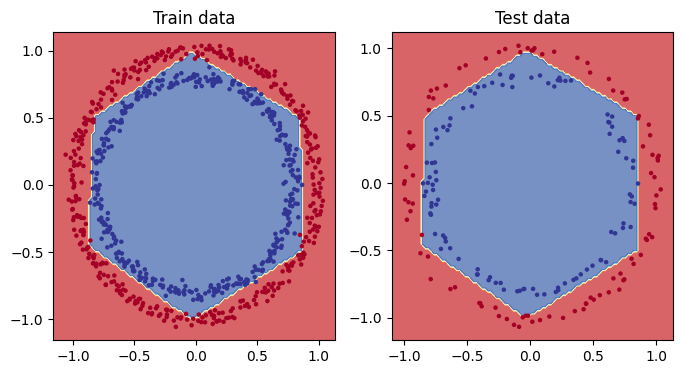

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Train data")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_1,X_test, y_test)
plt.title("Test data")
plt.show()

# New model to practice finding optimal learning rate

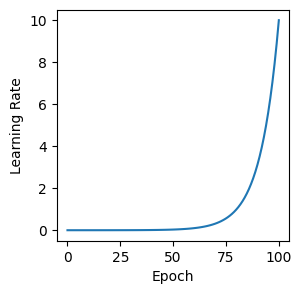

In [ ]:
# define the range of epochs
epochs = np.linspace(0, 100, 100)

# define the lambda function
lr = lambda epoch: 1e-4*10**(epoch/20)

# plot epochs versus learning rate
fig = plt.figure(figsize=(3, 3))
plt.plot(epochs, [lr(epoch) for epoch in epochs])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

<Axes: >

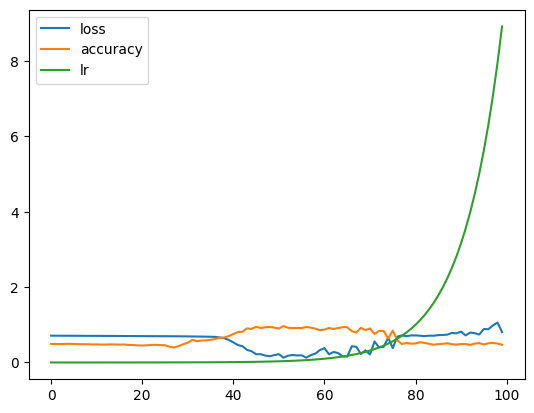

In [ ]:
tf. random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=0,
                        callbacks=[lr_scheduler])
history_df = pd.DataFrame(history_2.history)

history_df.plot()

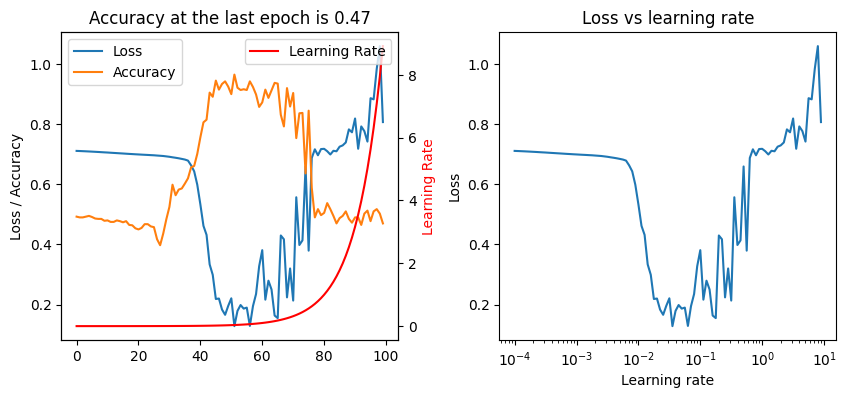

In [ ]:
# record history into the dataframe:
history_df = pd.DataFrame(history_2.history)

# plot history of training
g = plt.figure(figsize=(10,4)) # increased the figure size to make the plots more visible
ax1 = plt.subplot(1,2,1)

# Plot loss and accuracy values on the first y-axis
ax1.plot(history_df.index.values, history_df.loss.values, label='Loss')
ax1.plot(history_df.index.values, history_df.accuracy.values, label='Accuracy')
ax1.set_ylabel('Loss / Accuracy')

# Create the second y-axis and plot the learning rate values
ax2 = ax1.twinx()
ax2.plot(history_df.index.values, history_df.lr.values, 'r-', label='Learning Rate')
ax2.set_ylabel('Learning Rate', color='r')

# Add a legend for each y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title(f'Accuracy at the last epoch is {np.round(history_df.accuracy.values[-1], 3)}')

ax3 = plt.subplot(1,2,2)
ax3.semilogx(history_df.lr.values, history_df.loss.values)
ax3.set_title(f'Loss vs learning rate')
ax3.set_ylabel('Loss')
ax3.set_xlabel('Learning rate')

# Increase the width of the padding between subplots
plt.subplots_adjust(wspace=0.3) # adjust the value as needed
plt.show()

# Build another model with a higher learning rate


7/7 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 1.0000


Text(1.1, 1.1, 'Test data accuracy = 100.00%')

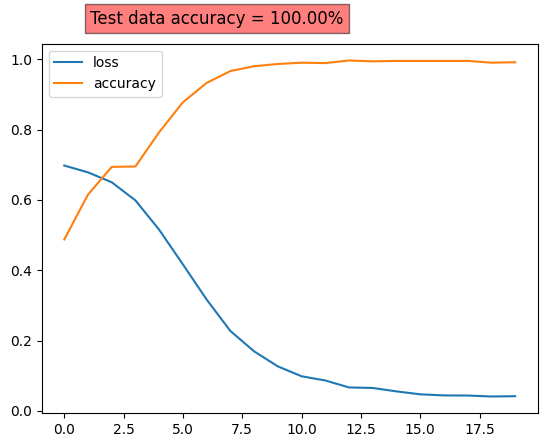

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=20, verbose=0)
history_df = pd.DataFrame(history_3.history)
history_df.plot()
loss, accuracy = model_3.evaluate(X_test, y_test)
acc_eval = f'Test data accuracy = {accuracy*100:.2f}%'

# Add a text box inside the plot
plt.text(1.1, 1.1, acc_eval, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))


313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


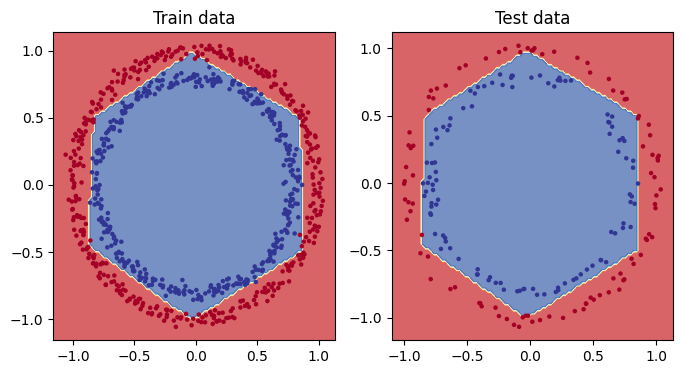

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Train data")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_1,X_test, y_test)
plt.title("Test data")
plt.show()

# Confusion matrix

In [ ]:
print(f'Test data accuracy = {accuracy*100:.2f}%')
y_preds = model_3.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

Test data accuracy = 100.00%
7/7 [==============================] - 0s 2ms/step


array([[ 96,   0],
       [  0, 104]])

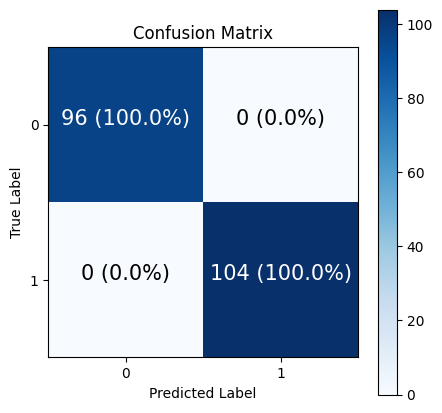

In [ ]:
import itertools

figsize=(5,5)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Prettify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plt
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()


# Adjust label size
ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ax.title.set_size(20)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multiclass classification problem


## Load data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data is split into train/test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


## Visualize data

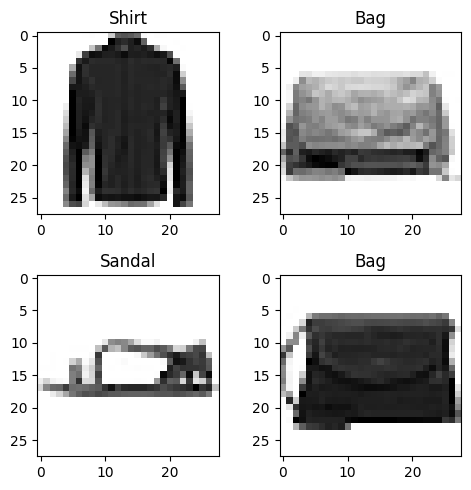

size of image (28, 28)


In [ ]:
import random
fig = plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap='Greys')
  plt.title(f'{labels[train_labels[rand_index]]}')
plt.tight_layout()
plt.show()

print(f'size of image {np.shape(train_data[rand_index])}')

## Normalize data

In [ ]:
train_data_norm, test_data_norm = train_data/255.0, test_data/255.0
print(f'min max values in teh normalized input data: {train_data_norm.min(), train_data_norm.max()}')

min max values in teh normalized input data: (0.0, 1.0)


## Build model

In [ ]:
# how to check a shape:
exmpl = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1))
])
exmpl.output_shape

(None, 784)

In [ ]:
tf.random.set_seed(42)

model_mc0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Input images are 28x28 with 1 grayscale color channel
    tf.keras.layers.Dense(64, activation="relu"),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(10, activation="softmax") # predict 10 classes
])

model_mc0.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)



## Learning rate optimization

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/5))

## Fit

In [ ]:
history_mc0 = model_mc0.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            callbacks=[lr_scheduler],
                            validation_data=(test_data_norm, test_labels))

model_mc0.summary()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7892 - accuracy: 0.7509 - val_loss: 0.5769 - val_accuracy: 0.8098 - lr: 1.0000e-04
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4987 - accuracy: 0.8324 - val_loss: 0.4926 - val_accuracy: 0.8299 - lr: 1.5849e-04
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4395 - accuracy: 0.8475 - val_loss: 0.4615 - val_accuracy: 0.8360 - lr: 2.5119e-04
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4066 - accuracy: 0.8592 - val_loss: 0.4234 - val_accuracy: 0.8504 - lr: 3.9811e-04
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3877 - accuracy: 0.8629 - val_loss: 0.4330 - val_accuracy: 0.8466 - lr: 6.3096e-04
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3717 - accuracy: 0.8675 - val_loss: 0.4174 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 7/10
1875/1875 [================

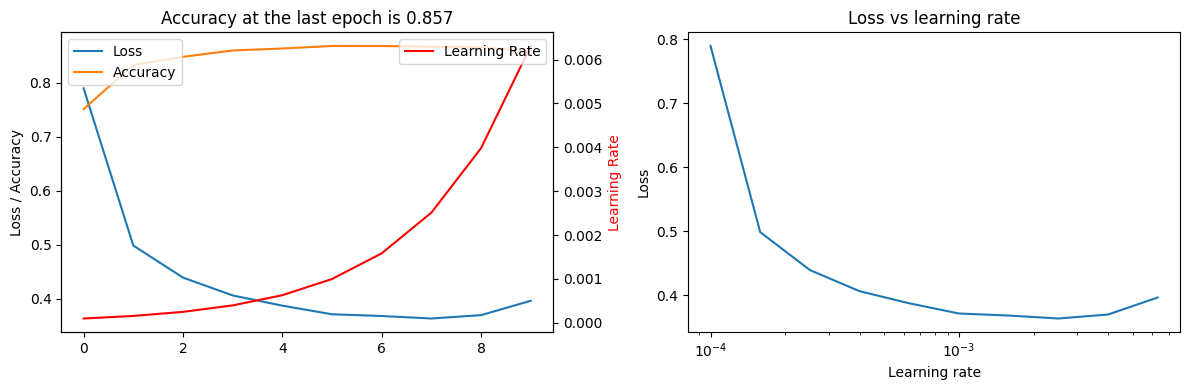

In [ ]:
# record history into the dataframe:
history_df = pd.DataFrame(history_mc0.history)

# plot history of training
g = plt.figure(figsize=(12,4)) # increased the figure size to make the plots more visible
ax1 = plt.subplot(1,2,1)

# Plot loss and accuracy values on the first y-axis
ax1.plot(history_df.index.values, history_df.loss.values, label='Loss')
ax1.plot(history_df.index.values, history_df.accuracy.values, label='Accuracy')
ax1.set_ylabel('Loss / Accuracy')

# Create the second y-axis and plot the learning rate values
ax2 = ax1.twinx()
ax2.plot(history_df.index.values, history_df.lr.values, 'r-', label='Learning Rate')
ax2.set_ylabel('Learning Rate', color='r')

# Add a legend for each y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title(f'Accuracy at the last epoch is {np.round(history_df.accuracy.values[-1], 3)}')

ax3 = plt.subplot(1,2,2)
ax3.semilogx(history_df.lr.values, history_df.loss.values)
ax3.set_title(f'Loss vs learning rate')
ax3.set_ylabel('Loss')
ax3.set_xlabel('Learning rate')

# Increase the width of the padding between subplots
plt.subplots_adjust(wspace=0.3) # adjust the value as needed
plt.tight_layout()
plt.show()

## After we learned what is the optimal leraning rate, we implement this parameter in our model

In [ ]:
tf.random.set_seed(42)

model_mc1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input images are 28x28
    tf.keras.layers.Dense(64, activation="relu"),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(10, activation="softmax") # predict 10 classes
])

model_mc1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=["accuracy"]
)

history_mc1 = model_mc0.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

model_mc1.summary()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3056 - accuracy: 0.8882 - val_loss: 0.4101 - val_accuracy: 0.8601
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2984 - accuracy: 0.8903 - val_loss: 0.4611 - val_accuracy: 0.8531
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.8916 - val_loss: 0.3946 - val_accuracy: 0.8595
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2876 - accuracy: 0.8926 - val_loss: 0.4553 - val_accuracy: 0.8534
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.8932 - val_loss: 0.4201 - val_accuracy: 0.8636
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2857 - accuracy: 0.8943 - val_loss: 0.4571 - val_accuracy: 0.8494
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2850 - accuracy: 0.8953 - val_loss: 0.4430 - val_accuracy:

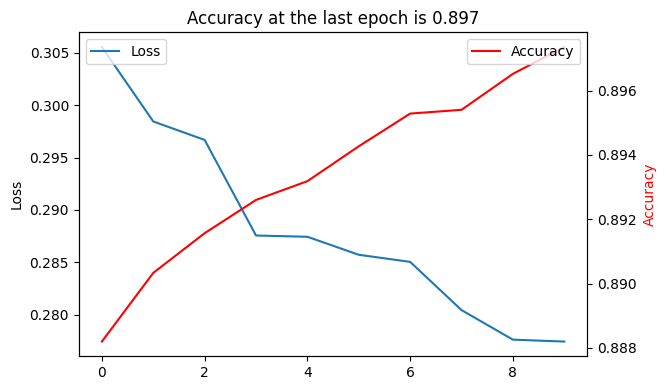

In [ ]:
# record history into the dataframe:
history_df = pd.DataFrame(history_mc1.history)

# plot history of training
g = plt.figure(figsize=(12,4)) # increased the figure size to make the plots more visible
ax1 = plt.subplot(1,2,1)

# Plot loss and accuracy values on the first y-axis
ax1.plot(history_df.index.values, history_df.loss.values, label='Loss')
ax1.set_ylabel('Loss')

# Create the second y-axis and plot the learning rate values
ax2 = ax1.twinx()
ax2.plot(history_df.index.values, history_df.accuracy.values,'r-', label='Accuracy')
ax2.set_ylabel('Accuracy', color='r')

# Add a legend for each y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title(f'Accuracy at the last epoch is {np.round(history_df.accuracy.values[-1], 3)}')

plt.tight_layout()
plt.show()

## Predict

In [ ]:
y_probs = model_mc0.predict(test_data_norm)
y_preds = np.argmax(y_probs, axis=1)
y_preds

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

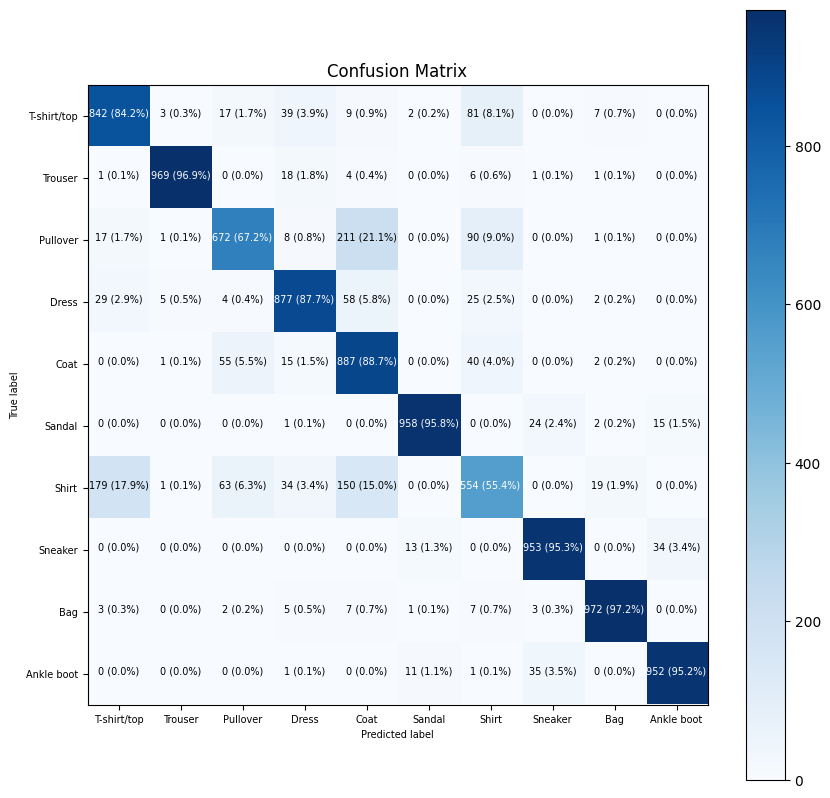

In [ ]:
# confusion matrix
make_confusion_matrix(test_labels, y_preds, classes=labels, figsize=(10,10), text_size=7)

## Plot a random image from the data and make predictions on it

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  import random
  """
  Picks a random image, shows it and gives it a predicted label, also compares with the truth labels
  """

  # Set up random sample
  i = random.randint(0, len(images))

  # create predictions and show targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Color code the prediction (right/wrong)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # add label to the plot
  plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% ({true_label})', color=color)


1/1 [==============================] - 0s 22ms/step


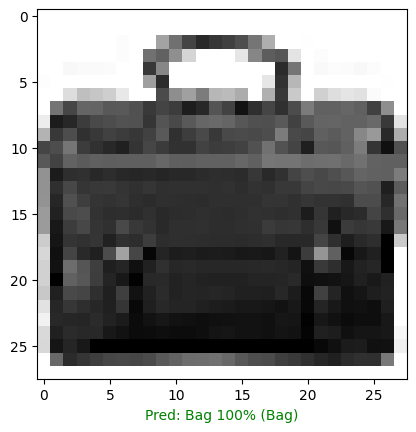

In [ ]:
plot_random_image(model_mc0, test_data_norm, test_labels, labels)

In [ ]:
print('A list of layers of our model: ', model_mc0.layers)
weights, biases = model_mc0.layers[1].get_weights()
weights, weights.shape

A list of layers of our model:  [<keras.layers.reshaping.flatten.Flatten object at 0x7f90351266b0>, <keras.layers.core.dense.Dense object at 0x7f9034f5c220>, <keras.layers.core.dense.Dense object at 0x7f9034f5cf10>]


(array([[ 0.15891121,  0.16814855,  0.0258774 , ...,  0.13132943,
         -2.1955829 , -0.30440488],
        [-0.05963979, -0.03306042,  0.04235483, ..., -2.361765  ,
         -0.47618786,  0.15362492],
        [-0.2159155 ,  0.04310423,  0.06351871, ..., -0.88908607,
          2.814739  , -0.01724414],
        ...,
        [-0.8787474 , -0.44361797, -0.63178504, ..., -1.5454435 ,
          0.7319064 , -0.22258438],
        [-0.6996764 , -0.35659128, -0.10200968, ..., -2.3488066 ,
         -0.6514832 , -0.38971496],
        [-0.35794312, -0.08372102, -0.04446211, ..., -1.5082344 ,
          2.7183719 , -0.3991429 ]], dtype=float32),
 (784, 64))

In [ ]:
biases, biases.shape

(array([ 0.96368796,  1.0037483 , -0.4555635 ,  0.38242677,  0.03484247,
         0.57308143,  0.78059334,  2.1762676 ,  1.6035538 , -3.208472  ,
         0.99698055,  0.02787969, -0.6642677 , -0.24360636,  4.3193474 ,
        -0.14146866,  1.6620368 ,  1.6949828 , -1.2616413 ,  1.8461573 ,
         2.1204426 , -0.27630737,  1.2472695 , -1.034964  ,  1.2931412 ,
         1.0213616 , -0.24581751,  1.6711679 ,  2.2471116 ,  2.1448503 ,
         0.39312392,  0.20302859,  0.3473052 ,  1.1217253 ,  0.02928882,
        -1.9148872 , -1.221143  ,  1.3920425 , -2.717293  , -0.458073  ,
        -0.18857001,  2.2483273 ,  0.7974002 ,  1.7647339 ,  3.2713315 ,
        -0.4763519 ,  3.0827634 , -4.3650293 , -0.4889744 , -0.04082922,
         0.50987375,  0.5947227 ,  1.9472667 , -0.01838469,  1.4501463 ,
         3.4696233 , -0.31941208,  3.8918977 ,  1.2353427 ,  0.1186611 ,
         1.526819  ,  2.4840467 ,  2.1929185 ,  0.95799094], dtype=float32),
 (64,))

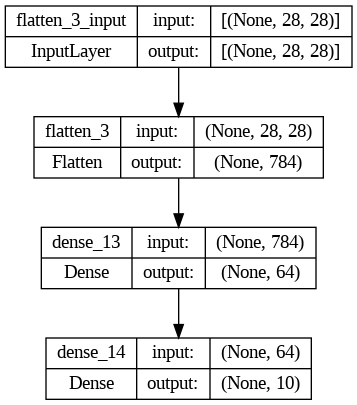

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_mc1, show_shapes=True)

# Toy tensor and activation function

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)

## Sigmoid

The sigmoid activation function is defined as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

Where:

- $x$ is the input to the function.
- $e$ is the base of natural logarithms.

The output of the sigmoid function gets mapped to a value between 0 and 1. This makes it useful for output neurons in binary classification, as it can represent a probability for class 1 (e.g. the neuron fires or it doesn't).



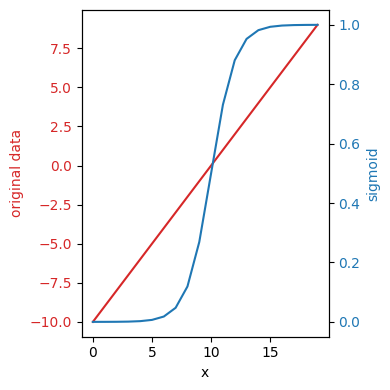

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use sigmoid on A tensor
fig, ax1 = plt.subplots(figsize=(4,4))

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('original data', color=color)
ax1.plot(A, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sigmoid', color=color)  # we already handled the x-label with ax1
ax2.plot(sigmoid(A), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# ReLU (Rectified Linear Unit)

ReLU stands for Rectified Linear Unit. It is a type of activation function widely used in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x, it returns that value back.

Mathematically, it can be written as:

$$
f(x) = max(0, x)
$$


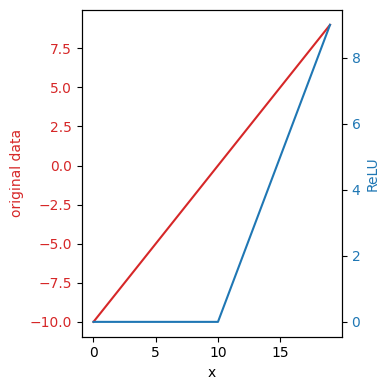

In [ ]:
def relu(x):
  return tf.maximum(0, x)

# Use ReLU on A tensor
fig, ax1 = plt.subplots(figsize=(4,4))

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('original data', color=color)
ax1.plot(A, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ReLU', color=color)  # we already handled the x-label with ax1
ax2.plot(relu(A), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Linear Activation Function

The Linear activation function is one of the simplest activation functions that can be used in a neural network. As the name suggests, this function is a linear transformation of the input. It does not transform the input, but rather scales it by a constant factor.

Mathematically, it can be written as:

$$
f(x) = ax
$$